## baseline paper


names goes here, affiliations, etc

### Background

white background here

### Methods and data

write methods here

### Results

write methods here

### Discussion

write discussion here

##### import libraries

pandas for data management, numpy and seaborn for analysis, matplotlib for visualization. Other libraries as needed for specific tasks (e.g. PAM).

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tableone import TableOne, load_dataset
from semopy import Model
import cite2c

#%matplotlib inline

##### read data

read data files here (csv ideally but also dta if needed) using pandas (follow the notation on the example).

In [9]:
# baseline data

#baseline1 = pd.read_excel('../data/baseline.xlsx', index_col=0) 
baseline2 = pd.read_csv('../data/baseline.csv')

baseline2.rename(columns = {'Total score':'Total_score', 'Comorbilidades.Desnutricion cronica':'Comorbilidades.Desnutricion.cronica', 'Programa_social.CunaMas - SAF':'Programa_social.CunaMas-SAF'}, inplace = True)
baseline2['Hemoglobina'].values[baseline2['Hemoglobina'] < 11.1] = 1
baseline2['Hemoglobina'].values[baseline2['Hemoglobina'] > 11] = 0
cleanup_mat = {"Hasta_que_grado_estudiaste_en_": {"Primaria_incompleta": 1, "Primaria_completa": 2, "Secundaria_incompleta": 3, "Secundaria_completa": 4, "Estudios_tecnicos_incompletos": 5, "Esudios_tecnicos_completos": 6}}
baseline2.replace(cleanup_mat, inplace = True)

##### data manipulation

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', baseline2.shape[0]+1)

baseline2.head()
#print(baseline2)

,Distrito,Comunidad,DNI_del_ni0,Edad_meses,Sexo,El_ni0_ha_recibido_una_prueb,Hemoglobina,Vacunacion,Edad_de_la_madre_o_cuidador,Embarazo_por_primera_vez,Hasta_que_grado_estudiaste_en_,Controles_prenatales,Suplementacion_embarazo,Problemas_embarazo.Anemia,Lugar_de_parto,Lactancia_meses,Tenia_Fiebre_o_tos1,Cuantos_dias_Fiebre_o_tos2,Fue_aposta_Fiebre_o_tos3,Tenia_Diarrea1,Cuantos_dias_Diarrea2,Fue_aposta_Diarrea3,Que_dar_Diarrea4.Nada en especial,Que_dar_Diarrea4.Sales de rehidratacion,Que_dar_Diarrea4.Frutiflex o electrolight/1milar,Diarrea4.Suero casero (preparación hecha en casa),Que_Dar_Diarrea4.Zinc,Que_Dar_Diarrea4.Pastilla antibiotico,Comorbilidades.Desnutricion.cronica,Comorbilidades.Anemia,Comorbilidades.Para1to1s,Comorbilidades.Neumonia,Comorbilidades.Malaria,Dar_Suplementacion_hierro,Dar_Suplementacion_multimicronut0,Suplementacion_chispitas_meses,Dar_Despara1tacion,Household_wealth_tv.radio.teli.cementfloor,Clean_water_source,drinks_from_river,Toilet_sanitary,toilet_latrina,toilet_openair,Tratamiento_de_agua,Tratamiento_de_agua_formas.La hierven,Tratamiento_de_agua_formas.Le echan lejia / cloro,Programa_social.CunaMas - Cuidado Diur0,Programa_social.CunaMas-SAF,Programa_social.Juntos,Programa_social.Vaso de Leche,Cuantos_Visita_ACS_year,ACS_ayuda,z_MOT,z_COG,z_LANG,z_SEM,z_OVERALL,Identifier,Score_beneficios_lm,score_para_produc_mas_lm,score_edad_lme,score_lactancia_prolongada,score_alimentos_comida_nutritiva,score_Como_se_da_cuenta_desnutrido,score_Por_queesta_ni0_desnutrido,score_Consecuencias_anemia,score_Preven_anemia,score_alimentos_ricos_en_hierro,score_Recomendaciones_mnt,score_Lavdo_de_ma0s,score_trat_agua,score_Prev_diarrea,score_Prev_malaria,Total_score,Sex,Weight,Height,age_in_days,age_in_months,age_group,cmeasure,oedema,clenhei,cbmi,csex,zlen,zlen_flag,zwei,zwei_flag,zbmi,zbmi_flag,zwfl,zwfl_flag
0,Mazan,Mazan,90816732.0,14.0,Femeni0,1.0,1.0,0,17.0,15.0,2.0,Algunas,1,0.0,Centro_de_salud,9.0,0.0,NaN,NaN,1.0,21.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,NaN,1,2.0,1.0,0.0,0.0,1.0,0.0,Nunca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,-1.477,-0.191,-0.353,-0.147,-0.839,338.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,20.0,F,1.0,72.0,375.0,12.320329,12-23 mo,NaN,n,72.0,1.929012,2.0,-0.93,0.0,-9.88,1.0,-13.03,1.0,-12.78,1.0
1,Tamshiyacu,Tamshiyacu,90925678.0,10.0,Masculi0,1.0,NaN,0,18.0,15.0,2.0,Todos,1,0.0,Hospital,NaN,1.0,2.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0_aplica,2.0,0.0,1.0,0.0,1.0,0.0,Siempre,1.0,0.0,1.0,0.0,0.0,1.0,12.0,0,-0.778,-1.113,-1.451,-0.807,-1.021,361.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,19.0,M,5.5,87.0,61.0,2.004107,00-05 mo,NaN,n,87.0,7.266482,1.0,14.28,1.0,-0.10,0.0,-7.52,1.0,-8.35,1.0
2,Punchana,Padre cocha,1.0,12.0,Femeni0,1.0,1.0,1,35.0,16.0,2.0,Todos,1,0.0,Hospital,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,NaN,0,0.0,1.0,0.0,0.0,1.0,0.0,A_veces,1.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,-1.228,-1.073,-1.055,-0.824,-1.112,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,19.0,F,8.7,53.0,338.0,11.104723,06-11 mo,NaN,n,53.0,30.971876,2.0,-7.88,1.0,-0.04,0.0,7.66,1.0,9.51,1.0
3,Tamshiyacu,Gallito,79735695.0,35.0,Femeni0,1.0,1.0,1,28.0,16.0,4.0,Algunas,0,0.0,Puesto_de_salud,24.0,1.0,7.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,NaN,1,3.0,0.0,0.0,0.0,1.0,0.0,Llega_tratada,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1.106,1.186,0.894,1.740,1.196,44.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,16.0,F,11.8,69.0,1076.0,35.351129,24-35 mo,NaN,n,69.0,24.784709,2.0,-6.77,1.0,-1.20,0.0,5.39,1.0,3.98,0.0
4,Las_Amazonas,Yanashi,81376142.0,32.0,Femeni0,1.0,0.0,1,40.0,20.0,2.0,Todos,1,0.0,Su_domicilio,12.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,12.0,1,0.0,0.0,1.0,0.0,1.0,0.0,A_veces,1.0,1.0,0.0,1.0,1.0,1.0,48.0,0,-0.332,-0.471,-1.410,0.051,-0.893,100.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,4.0,3.0,3.0,2.0,2.0,2.0,28.0,F,17.8,84.

##### basic stats

In [50]:
#np.nanmean(baseline2.Total_score)
#baseline2['Clean_water_source'] = baseline2['Clean_water_source'].replace([2],0)


baseline2['Hasta_que_grado_estudiaste_en_'] = baseline2['Hasta_que_grado_estudiaste_en_'].replace([5],4)
baseline2['Hasta_que_grado_estudiaste_en_'] = baseline2['Hasta_que_grado_estudiaste_en_'].replace([6],4)
baseline2['csex'] = baseline2['csex'].replace([2],0)


In [51]:
baseline2.sort_values(by=['Programa_social.CunaMas-SAF'])

#z_COG Hemoglobina Tenia_Diarrea1 Total_score Hasta_que_grado_estudiaste_en_ 


,Distrito,Comunidad,DNI_del_ni0,Edad_meses,Sexo,El_ni0_ha_recibido_una_prueb,Hemoglobina,Vacunacion,Edad_de_la_madre_o_cuidador,Embarazo_por_primera_vez,Hasta_que_grado_estudiaste_en_,Controles_prenatales,Suplementacion_embarazo,Problemas_embarazo.Anemia,Lugar_de_parto,Lactancia_meses,Tenia_Fiebre_o_tos1,Cuantos_dias_Fiebre_o_tos2,Fue_aposta_Fiebre_o_tos3,Tenia_Diarrea1,Cuantos_dias_Diarrea2,Fue_aposta_Diarrea3,Que_dar_Diarrea4.Nada en especial,Que_dar_Diarrea4.Sales de rehidratacion,Que_dar_Diarrea4.Frutiflex o electrolight/1milar,Diarrea4.Suero casero (preparación hecha en casa),Que_Dar_Diarrea4.Zinc,Que_Dar_Diarrea4.Pastilla antibiotico,Comorbilidades.Desnutricion.cronica,Comorbilidades.Anemia,Comorbilidades.Para1to1s,Comorbilidades.Neumonia,Comorbilidades.Malaria,Dar_Suplementacion_hierro,Dar_Suplementacion_multimicronut0,Suplementacion_chispitas_meses,Dar_Despara1tacion,Household_wealth_tv.radio.teli.cementfloor,Clean_water_source,drinks_from_river,Toilet_sanitary,toilet_latrina,toilet_openair,Tratamiento_de_agua,Tratamiento_de_agua_formas.La hierven,Tratamiento_de_agua_formas.Le echan lejia / cloro,Programa_social.CunaMas - Cuidado Diur0,Programa_social.CunaMas-SAF,Programa_social.Juntos,Programa_social.Vaso de Leche,Cuantos_Visita_ACS_year,ACS_ayuda,z_MOT,z_COG,z_LANG,z_SEM,z_OVERALL,Identifier,Score_beneficios_lm,score_para_produc_mas_lm,score_edad_lme,score_lactancia_prolongada,score_alimentos_comida_nutritiva,score_Como_se_da_cuenta_desnutrido,score_Por_queesta_ni0_desnutrido,score_Consecuencias_anemia,score_Preven_anemia,score_alimentos_ricos_en_hierro,score_Recomendaciones_mnt,score_Lavdo_de_ma0s,score_trat_agua,score_Prev_diarrea,score_Prev_malaria,Total_score,Sex,Weight,Height,age_in_days,age_in_months,age_group,cmeasure,oedema,clenhei,cbmi,csex,zlen,zlen_flag,zwei,zwei_flag,zbmi,zbmi_flag,zwfl,zwfl_flag
0,Mazan,Mazan,90816732.0,14.0,Femeni0,1.0,1.0,0,17.0,15.0,2.0,Algunas,1,0.0,Centro_de_salud,9.0,0.0,NaN,NaN,1.0,21.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,NaN,1,2.0,1.0,0.0,0.0,1.0,0.0,Nunca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,-1.477,-0.191,-0.353,-0.147,-0.839,338.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,20.0,F,1.00,72.0,375.0,12.320329,12-23 mo,NaN,n,72.0,1.929012,0.0,-0.93,0.0,-9.88,1.0,-13.03,1.0,-12.78,1.0
265,Mazan,Arturo Fernández,90105245.0,27.0,Femeni0,1.0,1.0,1,27.0,18.0,1.0,Todos,1,0.0,Su_domicilio,18.0,0.0,NaN,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,10.0,0,0.0,1.0,0.0,0.0,1.0,0.0,A_veces,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,-2.832,-2.498,-1.719,-1.896,-2.198,183.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,16.0,F,10.50,77.1,488.0,16.032854,12-23 mo,NaN,n,77.1,17.663654,0.0,-0.55,0.0,0.54,0.0,1.18,0.0,1.05,0.0
263,Tamshiyacu,Aahh Estevenson pizango,81804286.0,19.0,Femeni0,1.0,0.0,1,37.0,20.0,4.0,Todos,1,0.0,Su_domicilio,NaN,1.0,4.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,18.0,0_aplica,3.0,1.0,0.0,0.0,0.0,1.0,Nunca,0.0,0.0,1.0,0.0,0.0,0.0,6.0,Un_poco,-1.280,-1.389,-0.581,-1.038,-0.956,144.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0,F,7.70,76.0,544.0,17.872690,12-23 mo,NaN,n,76.0,13.331025,0.0,-1.58,0.0,-2.38,0.0,-2.00,0.0,-2.22,0.0
262,Tamshiyacu,AaHH Estevenson Pizango,90082547.0,29.0,Femeni0,1.0,1.0,1,26.0,15.0,2.0,0,0,0.0,Su_domicilio,12.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,25.0,0,2.0,1.0,0.0,1.0,0.0,0.0,Nunca,0.0,0.0,0.0,0.0,1.0,1.0,6.0,Un_poco,-0.386,0.002,-0.467,0.341,-0.280,176.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,19.0,F,12.80,86.0,820.0,26.940452,24-35 mo,NaN,n,86.0,17.306652,0.0,-0.66,0.0,0.45,0.0,1.19,0.0,1.04,0.0
261,Mazan,Cabo Pantoja,79780949.0,35.0,Femeni0,1.0,1.0,1,40.0,14.0,3.0,Todos,1,0.0,Centro_de_salud,34.0,1.0,7.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,33.0,1,4.0,1.0,0.0,0.0,1.0,0.0,Nunca,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,-1.217,-0.883,-1.730,-0.305,-1.362,49.0,1.0,1.0,1.0,1.0,3

##### example graph

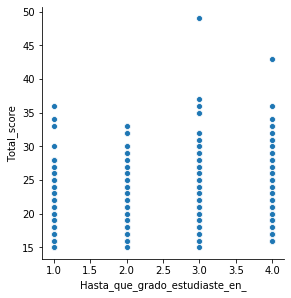

In [31]:
# change plot size
scatter1 = sns.pairplot(x_vars="Hasta_que_grado_estudiaste_en_", y_vars="Total_score", data=baseline2, height=4)


##### example table one

In [32]:
#which variables are we using?
columns = ['Hasta_que_grado_estudiaste_en_', 'Hemoglobina', 'Total_score', 'z_OVERALL', 'Clean_water_source', 'Household_wealth_tv.radio.teli.cementfloor']

#declare categorical
categorical = ['Hasta_que_grado_estudiaste_en_', 'Hemoglobina', 'Clean_water_source', 'Household_wealth_tv.radio.teli.cementfloor']

#options
groupby = 'Programa_social.CunaMas-SAF'
#nonnormal = ['bili']

#runs tableone and stores in mytable
mytable = TableOne(baseline2, columns=columns, categorical=categorical,
                   groupby=groupby, pval=True)

#show stuff in screen
print(mytable.tabulate(tablefmt="github"))

#exports to excel file
#mytable.to_excel('mytable.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\tableone\tableone.py:806: RuntimeWarning: Mean of empty slice
  return f.format(np.nanmean(x.values), self._std(x))


|                                                   |     | Missing   | Overall    | 0.0        | 1.0        | P-Value   |
|---------------------------------------------------|-----|-----------|------------|------------|------------|-----------|
| n                                                 |     |           | 437        | 266        | 141        |           |
| Hasta_que_grado_estudiaste_en_, n (%)             | 1.0 | 83        | 69 (19.5)  | 38 (17.7)  | 31 (22.3)  | 0.026     |
|                                                   | 2.0 |           | 70 (19.8)  | 46 (21.4)  | 24 (17.3)  |           |
|                                                   | 3.0 |           | 137 (38.7) | 74 (34.4)  | 63 (45.3)  |           |
|                                                   | 4.0 |           | 78 (22.0)  | 57 (26.5)  | 21 (15.1)  |           |
| Hemoglobina, n (%)                                | 0.0 | 95        | 212 (62.0) | 128 (60.4) | 84 (64.6)  | 0.503     |
|               

##### semopy example model

In [58]:
#mod = """ ECD ~ Knowledge + Health + CHA
#          ECD =~ z_COG + z_MOT
#          CHA =~ Cuantos_Visita_ACS_year
#          Knowledge =~ Total_score
#          Health =~ Tenia_Fiebre_o_tos1 + Tenia_Diarrea1 + Comorbilidades.Anemia + Comorbilidades.Malaria + Comorbilidades.Neumonia + Comorbilidades.Desnutricion.cronica
#          Knowledge ~ Household_wealth_tv.radio.teli.cementfloor
#          Health ~ Pregnancy + Sanitation
#          Pregnancy =~ Problemas_embarazo.Anemia
#          Sanitation =~ Clean_water_source + Toilet_sanitary
#      """
#code and add maternal education to knowledge

mod = """ ECD ~ Knowledge + Diarrhea + Anemia + Maternal_Education + Sanitation + SES
          Anemia ~ Knowledge
          Diarrhea ~ Knowledge
          Knowledge ~ Maternal_Education + Sanitation + SES + CHA
          CHA =~ Programa_social.CunaMas-SAF
          Knowledge =~ Total_score
          Anemia =~ Hemoglobina
          Diarrhea =~ Tenia_Diarrea1
          Maternal_Education =~ Hasta_que_grado_estudiaste_en_
          Sanitation =~ Clean_water_source
          SES =~ Household_wealth_tv.radio.teli.cementfloor
          ECD =~ z_COG + z_MOT
      """

model = Model(mod)

In [60]:
model.load_dataset(baseline2, ordcor=True)


from semopy import Optimizer
opt = Optimizer(model)
objective_function_value = opt.optimize()

from semopy import inspect
inspect(opt)

,lval,op,rval,Value,SE,Z-score,P-value
12,ECD,=~,z_MOT,9.006813e-01,0.066321,1.358064e+01,0.000000e+00
0,Anemia,~,Knowledge,-3.667947e-01,0.121637,-3.015482e+00,2.565715e-03
1,Diarrhea,~,Knowledge,-5.894438e-01,0.129092,-4.566063e+00,4.969693e-06
2,ECD,~,Anemia,-5.715805e-01,0.107586,-5.312762e+00,1.079762e-07
3,ECD,~,Diarrhea,-7.942424e-01,0.193022,-4.114785e+00,3.875398e-05
4,ECD,~,Knowledge,1.350371e+00,0.336782,4.009626e+00,6.081501e-05
5,ECD,~,Maternal_Education,-8.507943e-01,0.190759,-4.460037e+00,8.194556e-06
6,ECD,~,SES,1.227306e+00,0.332263,3.693777e+00,2.209480e-04
7,ECD,~,Sanitation,5.201935e-01,0.161128,3.228452e+00,1.244623e-03
8,Knowledge,~,CHA,-1.428290e-01,0.164571,-8.678878e-01,3.854558e-01


In [61]:
from semopy import gather_statistics 
#fit statistics
stats = gather_statistics(opt)
print(stats)

SEMStatistics(dof=9.0, ml=nan, fit_val=0.1263477206759509, chi2=(55.21395393539054, 1.108786007453233e-08), dof_baseline=36.0, chi2_baseline=810.1956729133329, rmsea=0.10852306830616588, cfi=0.9403071399747233, gfi=0.9318510876059729, agfi=0.7274043504238916, nfi=0.9318510876059729, tli=0.7612285598988928, aic=nan, bic=nan, params=[ParametersStatistics(value=-0.3667947144255537, se=0.1216371910062932, zscore=-3.015481625217416, pvalue=0.0025657148433637644), ParametersStatistics(value=-0.5894438342657373, se=0.12909235530858043, zscore=-4.566063055028886, pvalue=4.969693358169991e-06), ParametersStatistics(value=-0.5715805109080377, se=0.1075863262661978, zscore=-5.312761674643295, pvalue=1.0797621374791788e-07), ParametersStatistics(value=-0.7942424469176182, se=0.19302159584122838, zscore=-4.114785412751507, pvalue=3.8753977146477325e-05), ParametersStatistics(value=1.3503706578425203, se=0.33678220230239553, zscore=4.009625949966376, pvalue=6.081500791776939e-05), ParametersStatisti

In [11]:
mod1 = """ z_COG ~ Total_score + Tenia_Diarrea1 + Hemoglobina + Hasta_que_grado_estudiaste_en_ + Clean_water_source + Household_wealth_tv.radio.teli.cementfloor
          Hemoglobina ~ Total_score
          Tenia_Diarrea1 ~ Total_score
          Total_score ~ Hasta_que_grado_estudiaste_en_ + Clean_water_source + Household_wealth_tv.radio.teli.cementfloor + Programa_social.CunaMas-SAF
      """
model = Model(mod1)

In [12]:
model.load_dataset(baseline2, ordcor=True)


from semopy import Optimizer
opt1 = Optimizer(model)
opt1.optimize(objective='MLW')
opt1.optimize(method="L-BFGS-B")

from semopy import inspect
inspect(opt1)

,lval,op,rval,Value,SE,Z-score,P-value
0,Hemoglobina,~,Total_score,-0.051035,0.047774,-1.068262,2.854024e-01
1,Tenia_Diarrea1,~,Total_score,-0.048865,0.047779,-1.022724,3.064381e-01
2,Total_score,~,Clean_water_source,0.181908,0.057922,3.140552,1.686296e-03
3,Total_score,~,Hasta_que_grado_estudiaste_en_,0.191148,0.048658,3.928365,8.552544e-05
4,Total_score,~,Household_wealth_tv.radio.teli.cementfloor,0.063125,0.050377,1.253040,2.101910e-01
5,Total_score,~,Programa_social.CunaMas-SAF,0.463710,0.056207,8.249987,2.220446e-16
9,z_COG,~,Clean_water_source,0.111485,0.047716,2.336444,1.946809e-02
10,z_COG,~,Hasta_que_grado_estudiaste_en_,0.081140,0.050844,1.595870,1.105177e-01
6,z_COG,~,Hemoglobina,-0.092501,0.045456,-2.034968,4.185408e-02
11,z_COG,~,Household_wealth_tv.radio.teli.cementfloor,-0.088397,0.052636,-1.679403,9.307347e-02


In [13]:
from semopy import gather_statistics 
#fit statistics
stats = gather_statistics(opt1)
print(stats)

SEMStatistics(dof=10.0, ml=nan, fit_val=0.24124310388809178, chi2=(105.42323639909611, 0.0), dof_baseline=22.0, chi2_baseline=120.7291719945457, rmsea=0.1479393909487534, cfi=0.03348489133112775, gfi=0.12677909856071135, agfi=-0.9210859831664351, nfi=0.12677909856071137, tli=-1.1263332390715188, aic=nan, bic=nan, params=[ParametersStatistics(value=-0.05103537552696773, se=0.04777421572174115, zscore=-1.0682619223547867, pvalue=0.2854023795320746), ParametersStatistics(value=-0.04886516865716125, se=0.04777940770596492, zscore=-1.0227244539500238, pvalue=0.30643814586227425), ParametersStatistics(value=0.18190839524678779, se=0.05792242057308481, zscore=3.140552370633761, pvalue=0.001686295548679384), ParametersStatistics(value=0.19114822959157218, se=0.048658473419964834, zscore=3.9283647051124846, pvalue=8.552544347772972e-05), ParametersStatistics(value=0.0631245108579025, se=0.05037707520077889, zscore=1.2530404078653912, pvalue=0.21019100146564362), ParametersStatistics(value=0.463

In [111]:
#Start from here

mod2 = """z_COG ~ Total_score + Hemoglobina + Tenia_Diarrea1 + age_in_months + Edad_de_la_madre_o_cuidador 
          Total_score ~ Hasta_que_grado_estudiaste_en_ + Programa_social.CunaMas-SAF 
      """

model = Model(mod2)

In [112]:
#variables = {'Hasta_que_grado_estudiaste_en_', 'Hemoglobina', 'Tenia_Diarrea1', 'Programa_social.CunaMas-SAF'}
model.load_dataset(baseline2, ordcor=True)

from semopy import Optimizer
opt2 = Optimizer(model)
opt2.optimize(objective='MLW')
opt2.optimize(method="L-BFGS-B")

from semopy import inspect
inspect(opt2)

,lval,op,rval,Value,SE,Z-score,P-value
0,Total_score,~,Hasta_que_grado_estudiaste_en_,0.195885,0.044719,4.380359,1.184842e-05
1,Total_score,~,Programa_social.CunaMas-SAF,0.341486,0.044719,7.636274,2.242651e-14
3,z_COG,~,Edad_de_la_madre_o_cuidador,-0.117565,0.046372,-2.535229,1.123738e-02
4,z_COG,~,Hemoglobina,-0.091385,0.047843,-1.910109,5.611913e-02
5,z_COG,~,Tenia_Diarrea1,-0.107006,0.047503,-2.252604,2.428412e-02
2,z_COG,~,Total_score,0.226319,0.045627,4.960226,7.041105e-07
6,z_COG,~,age_in_months,0.099795,0.047518,2.100154,3.571533e-02
7,Total_score,~~,Total_score,0.861164,0.058259,14.781745,0.000000e+00
8,z_COG,~~,z_COG,0.897582,0.060722,14.781745,0.000000e+00


In [113]:
from semopy import gather_statistics 
#fit statistics
stats = gather_statistics(opt2)
print(stats)


SEMStatistics(dof=6.0, ml=nan, fit_val=0.03331698783554626, chi2=(14.559523684133717, 0.02397367237888537), dof_baseline=13.0, chi2_baseline=87.97075607133242, rmsea=0.05720130397020766, cfi=0.885828499902154, gfi=0.834495867327457, agfi=0.6414077125428235, nfi=0.834495867327457, tli=0.752628416454667, aic=nan, bic=nan, params=[ParametersStatistics(value=0.19588480069244077, se=0.044718896573910316, zscore=4.380358544050986, pvalue=1.1848418878246392e-05), ParametersStatistics(value=0.3414857405270622, se=0.04471889657391032, zscore=7.6362738502509, pvalue=2.2426505097428162e-14), ParametersStatistics(value=0.22631906734157056, se=0.04562676104862998, zscore=4.960226457788547, pvalue=7.041104734817338e-07), ParametersStatistics(value=-0.11756467952305316, se=0.04637240841951289, zscore=-2.5352291055697744, pvalue=0.011237380485036086), ParametersStatistics(value=-0.09138539124844991, se=0.04784301372891242, zscore=-1.9101094208727474, pvalue=0.056119126271244824), ParametersStatistics(